# **Image Processing with OpenCV**

OpenCV is one of the famously used open-source Python libraries meant exclusively for Computer Vision. Modules and methods available in OpenCV allow users to perform image processing with a few lines of codes. In this tutorial, we discuss different image processing techniques of OpenCV with hands-on Python codes.

## **Thresholding on Image**

Thresholding is the process of forcing a certain or all the pixel values either to zero or to the maximum possible value. Various thresholding techniques are available to process images. Thresholding can be performed either with a grayscale image or a colour image.

Binary thresholding makes pixel values either to zero or 255 based on the threshold value provided. The pixel values below the threshold value are set to zero, and the pixel values above the threshold value are set to 255. We can recall that 0 refers to black and 255 refers to white in a grayscale image. Thus a grayscale image applied with binary thresholding will become a black-and-white-only image. On the other hand, a colour image applied with binary threshold values will only have black, blue, green, red or any combination of the latter three colours. For instance, combination B+G+R gives white colour, and R+G gives yellow colour.

Inverse binary thresholding is the inverted process of binary thresholding. The pixel values above the threshold are set to zero and the pixel values below the threshold are set to 255. The resulting image will become a black-and-white-only image if the input is a grayscale image.

In truncated thresholding, the pixel values below the threshold are left unaltered, and all other values are set to the threshold value.

Threshold-to-zero is the thresholding process of setting the pixel values below the threshold to zero while the pixel values above the threshold are left unaltered.

Threshold-to-zero-inverse is the thresholding process of setting the pixel values above the threshold to zero while the pixel values below the threshold are left unaltered.

For better understanding, we perform all the above-discussed thresholding processes on a grayscale image.

In [ ]:
!python -m pip install pip --upgrade --user -q --no-warn-script-location
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn nltk gensim scikit-image opencv-python --user -q --no-warn-script-location

import IPython
IPython.Application.instance().kernel.do_shutdown(True)


In [1]:
import cv2
import matplotlib.pyplot as plt

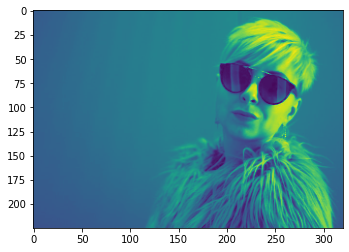

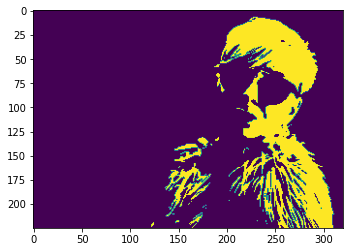

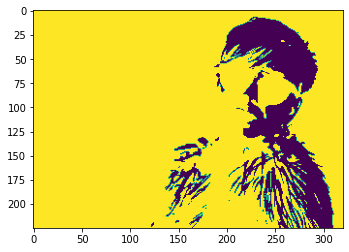

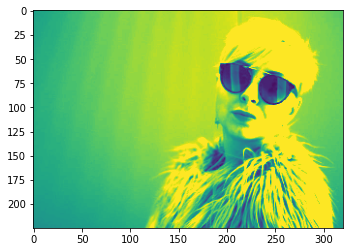

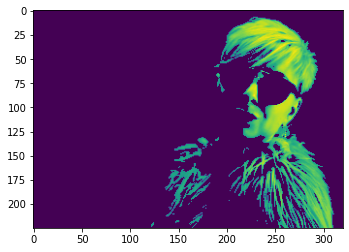

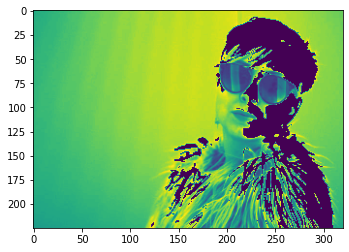

In [2]:
# read an image in grayscale
img = cv2.imread('daria.jpg', 0)
img = cv2.resize(img, (320,225))
# apply various thresholds
val, th1 = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY)
val, th2 = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY_INV)
val, th3 = cv2.threshold(img, 110, 255, cv2.THRESH_TRUNC)
val, th4 = cv2.threshold(img, 110, 255, cv2.THRESH_TOZERO)
val, th5 = cv2.threshold(img, 110, 255, cv2.THRESH_TOZERO_INV)
# display the images
plt.figure()
plt.imshow(img) 
plt.show()
plt.imshow(th1) 
plt.show()
plt.imshow(th2) 
plt.show()
plt.imshow(th3) 
plt.show()
plt.imshow(th4) 
plt.show()
plt.imshow(th5) 
plt.show()

The fixed threshold does not yield good results when there is a difference in illumination on the object of interest. For instance, in the above binary thresholding process, the portion of the human face with more illumination is represented by white pixels, while the portion with less illumination is represented by black pixels. This issue can be tackled by incorporating adaptive thresholding. Adaptive thresholding determines the threshold values locally. It takes as arguments the number of local neighborhood pixels (an odd-valued kernel) and the constant pixel value by which each pixel is subtracted from. The two types of adaptive threshold determination are Mean (arithmetic mean of neighborhood pixels) and Gaussian (Gaussian mean to exclude noises).

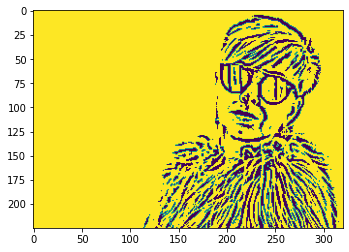

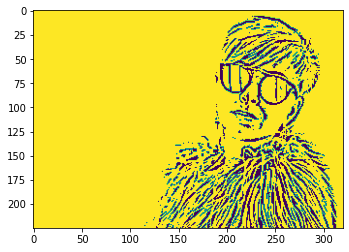

In [3]:
img = cv2.imread('daria.jpg', 0)
img = cv2.resize(img, (320,225))
# apply various adaptive thresholds
th1 = cv2.adaptiveThreshold(img, 255, \
                                cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 7, 4)
th2 = cv2.adaptiveThreshold(img, 255, \
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                cv2.THRESH_BINARY, 7, 4)
# display the images
plt.figure()
plt.imshow(th1) 
plt.show()
plt.imshow(th2) 
plt.show()

## **Image Smoothing**

Image smoothing is an important image processing technique that performs blurring and noise filtering in an image. It finds applications in preprocessing and postprocessing of deep learning models. In general, smoothing is performed by a 2D kernel of a specific size on each channel of the image. The kernel average of neighborhoods yields the resulting image. The famous smoothing algorithms in use are Blur, Gaussian Blur, Median Blur and Bilateral Filter.

Blur method is the simple filter that homogeneously applies its kernel to calculate the local weighted average.

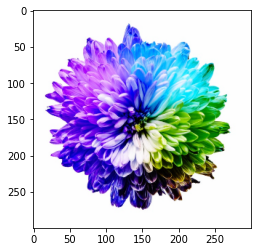

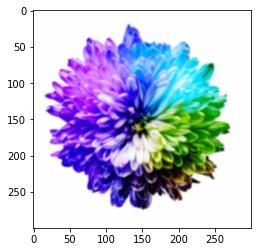

In [4]:
img = cv2.imread('sharon.jpg', 1)
img = cv2.resize(img, (300,300))
# Apply blur
img1 = cv2.blur(img,(3,3))
# display the images
plt.figure()
plt.imshow(img) 
plt.show()
plt.imshow(img1) 
plt.show()

Gaussian Blurring is the process of removing Gaussian noise from an image. This method takes the image, the kernel size and the standard deviation as arguments.

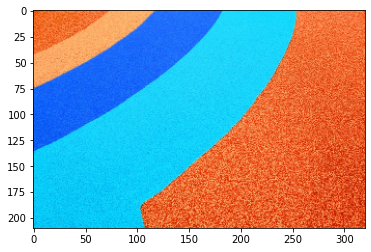

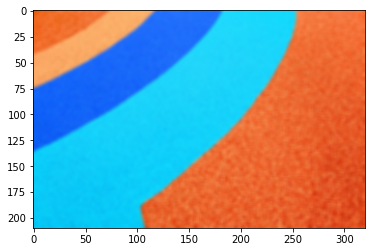

In [5]:
img = cv2.imread('keiron.jpg', 1)
img = cv2.resize(img, (320,210))
# Apply Gaussian blur
img1 = cv2.GaussianBlur(img,(5,5),2)
# display the images
plt.figure()
plt.imshow(img) 
plt.show()
plt.imshow(img1) 
plt.show()

Median blur is known for its salt-and-pepper noise removal. Unwanted small white and black dots on an image is removed with this tool.

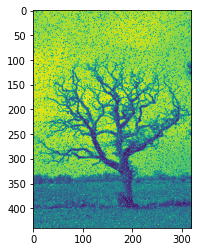

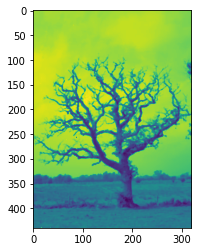

In [6]:
img = cv2.imread('tree.png', 0)
# Apply median blur
img1 = cv2.medianBlur(img,3)
# display the images
plt.figure()
plt.imshow(img) 
plt.show()
plt.imshow(img1) 
plt.show()

Bilateral Filter is used when there is a need for both noise filtering and edges retention. This method detects sharp edges and keeps it as such without any blur.

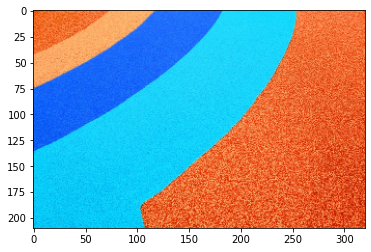

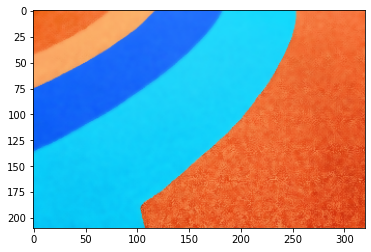

In [7]:
img = cv2.imread('keiron.jpg', 1)
img = cv2.resize(img, (320,210))
# Apply Bilateral Filter
img1 = cv2.bilateralFilter(img,7,100,100)
# display the images
plt.figure()
plt.imshow(img) 
plt.show()
plt.imshow(img1) 
plt.show()

## **Image Gradients**

mage gradients are the rate of change of pixel values in either x or y direction or in both x and y directions. It helps identify the sudden changes in pixel values. In other words, it helps detect the edges. If the gradient is applied in x-direction, vertical edges are detected. If the gradient is applied in y-direction, horizontal edges are detected.

In OpenCV, Laplacian gradient detects edges both horizontally and vertically, while Sobel gradient detects edges either horizontally or vertically.

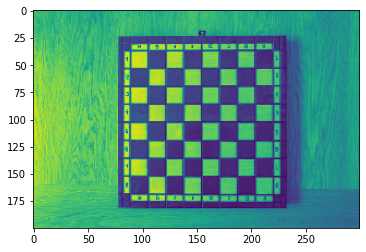

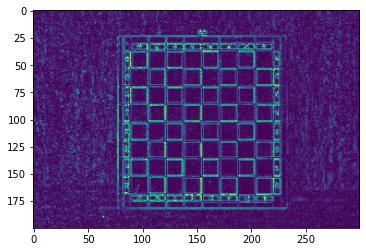

In [8]:
import numpy as np
img = cv2.imread('chessboard.jpg', 0)
img = cv2.resize(img, (300,200))
# Laplacian image gradient
lap = np.uint8(np.absolute(cv2.Laplacian(img,cv2.CV_64F, ksize=1)))
# display the images
plt.figure()
plt.imshow(img) 
plt.show()
plt.imshow(lap) 
plt.show()

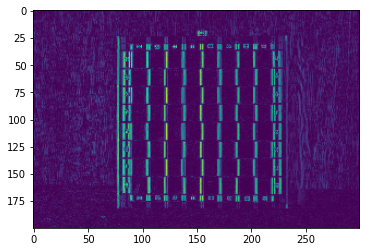

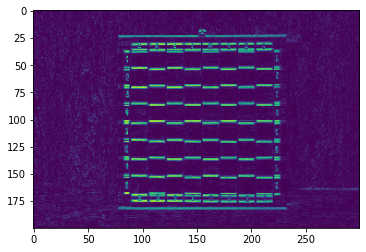

In [9]:
img = cv2.imread('chessboard.jpg', 0)
img = cv2.resize(img, (300,200))
# Sobel image gradient
vertical = np.uint8(np.absolute(cv2.Sobel(img,cv2.CV_64F, 1,0, ksize=1)))
horizon = np.uint8(np.absolute(cv2.Sobel(img,cv2.CV_64F, 0,1, ksize=1)))
# display the images
plt.figure()
plt.imshow(vertical) 
plt.show()
plt.imshow(horizon) 
plt.show()

Vertical and horizontal edges can be blended together to generate an image gradient with all edges.

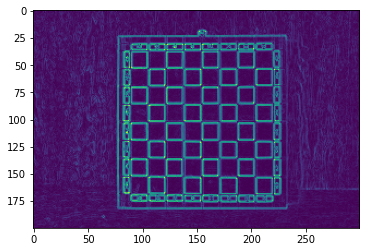

In [10]:
Sobel = cv2.bitwise_or(vertical, horizon)
plt.figure()
plt.imshow(Sobel) 
plt.show()

## **Canny Edge Detection**

Canny Edge Detection is a powerful edge detection algorithm that performs Gaussian noise filtering, Sobel based horizontal and vertical edges detection, non-maximum suppression to remove unwanted edge points and hysteresis thresholding with two limiting thresholds to have thin and strong edges.

In [11]:
##Try running this is in your local
# img = cv2.imread('chessboard.jpg', 0)
# img = cv2.resize(img, (450,300))
# def null(x):
#     pass
# # create trackbars to control threshold values
# cv2.namedWindow('Canny')
# cv2.resizeWindow('Canny', (450,300))
# cv2.createTrackbar('MIN', 'Canny', 80,255, null)
# cv2.createTrackbar('MAX', 'Canny', 120,255, null)
# while True:
#     # get Trackbar position
#     a = cv2.getTrackbarPos('MIN', 'Canny')
#     b = cv2.getTrackbarPos('MAX', 'Canny')
#     # Canny Edge detection
#     # arguments: image, min_val, max_val
#     canny = cv2.Canny(img,a,b)
#     # display the images
#     cv2.imshow('Canny', canny)
#     k = cv2.waitKey(1) & 0xFF
#     if k == ord('q'):
#         break
# cv2.destroyAllWindows() 

KeyboardInterrupt: 

By changing the minimum and maximum threshold values, we can improve the results.

## **Image Contours**

Image contours are the continuous shape outlines present in an image. OpenCV detects the contours present in an image and collects its coordinates as a list. The collected contours can be drawn over the original image back.

In [12]:
img = cv2.imread('valerie.jpg', 1)
img = cv2.resize(img, (320,480))
# show original image
plt.figure()
plt.imshow(img) 
plt.show()# binary thresholding
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val,th = cv2.threshold(gray, 127,255,cv2.THRESH_BINARY)
# find contours
contours,_ = cv2.findContours(th, 
                              cv2.RETR_TREE,
                              cv2.CHAIN_APPROX_NONE)
# draw contours on original image
# arguments: image, contours list, index of contour, colour, thickness
cv2.drawContours(img, contours, -1, (0,0,255),1)
plt.figure()
plt.imshow(img) 
plt.show()

Contours are the fundamental building blocks for object shape detection, motion detection and image segmentation. Contours are collected in a Python list. We can draw a particular contour or contours by indexing or slicing those contours alone.

In [ ]:
# slice the contours list
face = contours[455:465]
cv2.drawContours(img, face, -1, (0,0,255),1)
plt.figure()
plt.imshow(img) 
plt.show()

#**Related Articles:**

> * [Real Time GUI Interactions with OpenCV](https://analyticsindiamag.com/real-time-gui-interactions-with-opencv-in-python/)

> * [Image Processing with OpenCV](https://analyticsindiamag.com/image-processing-with-opencv-in-python/)

> * [Getting started with OpenCV]((https://analyticsindiamag.com/getting-started-with-opencv-in-python/))

